In [1]:
from lale.grammar import Grammar, explore
from lale.helpers import to_graphviz, wrap_imported_operators

# Simple: First example

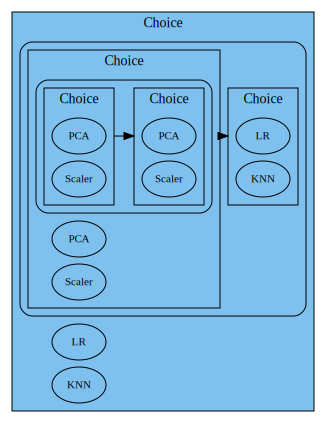

In [2]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as Scaler
wrap_imported_operators()

g = Grammar()

g.start       = g.estimator
g.estimator   = g.prim_est | g.transformer >> g.prim_est
g.transformer = g.prim_tfm | g.prim_tfm >> g.transformer

g.prim_est    = LR | KNN
g.prim_tfm    = PCA | Scaler

generated = explore(g, 4)
to_graphviz(generated)

## Training

100%|██████████| 3/3 [00:01<00:00,  2.03it/s, best loss: -0.9014363327674024]


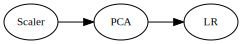

In [3]:
from lale.lib.lale import Hyperopt
from lale.helpers import best_estimator
import lale.datasets
(train_X, train_y), (test_X, test_y) = lale.datasets.load_iris_df()

trainer = Hyperopt(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))

# Grammar that exercices all combinators

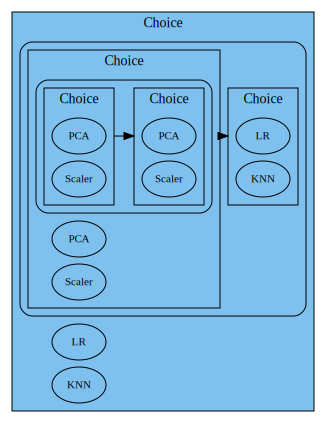

In [4]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.ensemble import AdaBoostClassifier as Boost
from lale.lib.lale import ConcatFeatures as Concat
wrap_imported_operators()

g = Grammar()

g.start       = g.estimator
g.estimator   = g.term_est | g.transformer >> g.term_est
g.term_est    = g.prim_est # | g.ensemble      # Todo add higher-order operators
# g.ensemble    = g.ensembler ( g.estimator )
g.transformer = g.union_tfm | g.union_tfm >> g.transformer
g.union_tfm   = g.prim_tfm | g.union_body >> Concat
g.union_body  = g.transformer | g.transformer & g.union_body

g.prim_est    = LR | KNN
g.prim_tfm    = PCA | Scaler
g.ensembler   = Boost

generated = explore(g, 5)
to_graphviz(generated)

100%|██████████| 3/3 [00:01<00:00,  1.73it/s, best loss: -0.8770363327674024]


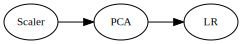

In [5]:
trainer = Hyperopt(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))

# recipe: grammar from this [paper](https://link.springer.com/chapter/10.1007/978-3-319-55696-3_16)

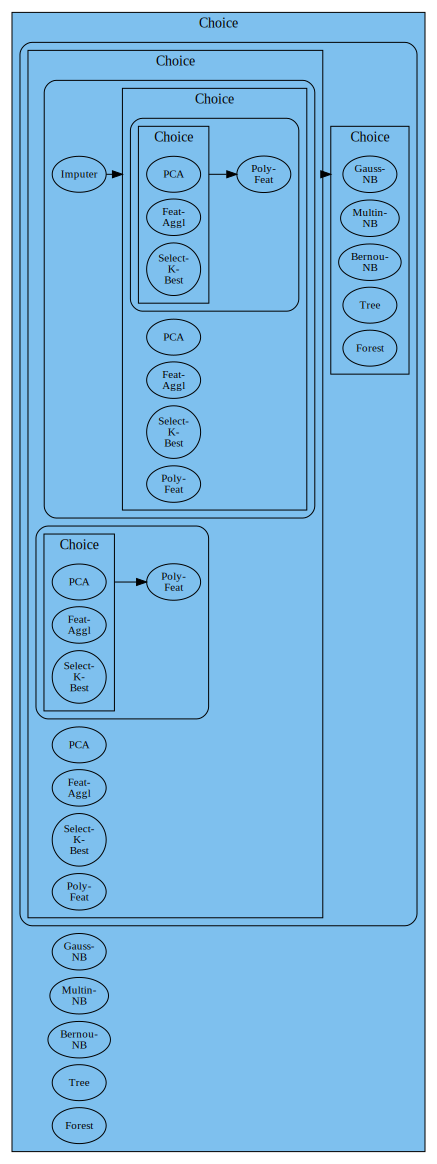

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration as FeatAggl
from sklearn.preprocessing import PolynomialFeatures as PolyFeat
from sklearn.naive_bayes import GaussianNB as GaussNB
from sklearn.naive_bayes import MultinomialNB as MultinNB
from sklearn.naive_bayes import BernoulliNB as BernouNB
from sklearn.impute import SimpleImputer as Imputer
from sklearn.ensemble import RandomForestClassifier as Forest
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.feature_selection import SelectKBest
wrap_imported_operators()

g = Grammar()

g.start = g.algorithm | g.preprocessing >> g.algorithm
g.preprocessing = g.imputation >> g.dimensionality_definition | g.dimensionality_definition
g.dimensionality_definition = g.feature_selection >> g.feature_construction | g.feature_selection | g.feature_construction
g.feature_selection = g.unsupervised | g.supervised 
g.algorithm = g.naive_bayes | g.trees

g.imputation = Imputer
g.supervised = SelectKBest
g.unsupervised = PCA | FeatAggl
g.feature_construction = PolyFeat
g.naive_bayes = GaussNB | MultinNB | BernouNB
g.trees = Tree | Forest


generated = explore(g, 15)
to_graphviz(generated)

100%|██████████| 3/3 [00:02<00:00,  1.40it/s, best loss: -0.9139575551782683]


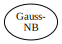

In [7]:
trainer = Hyperopt(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))

# alphad3m: Grammar from this [paper](https://www.automl.org/wp-content/uploads/2019/06/automlws2019_Paper34.pdf)

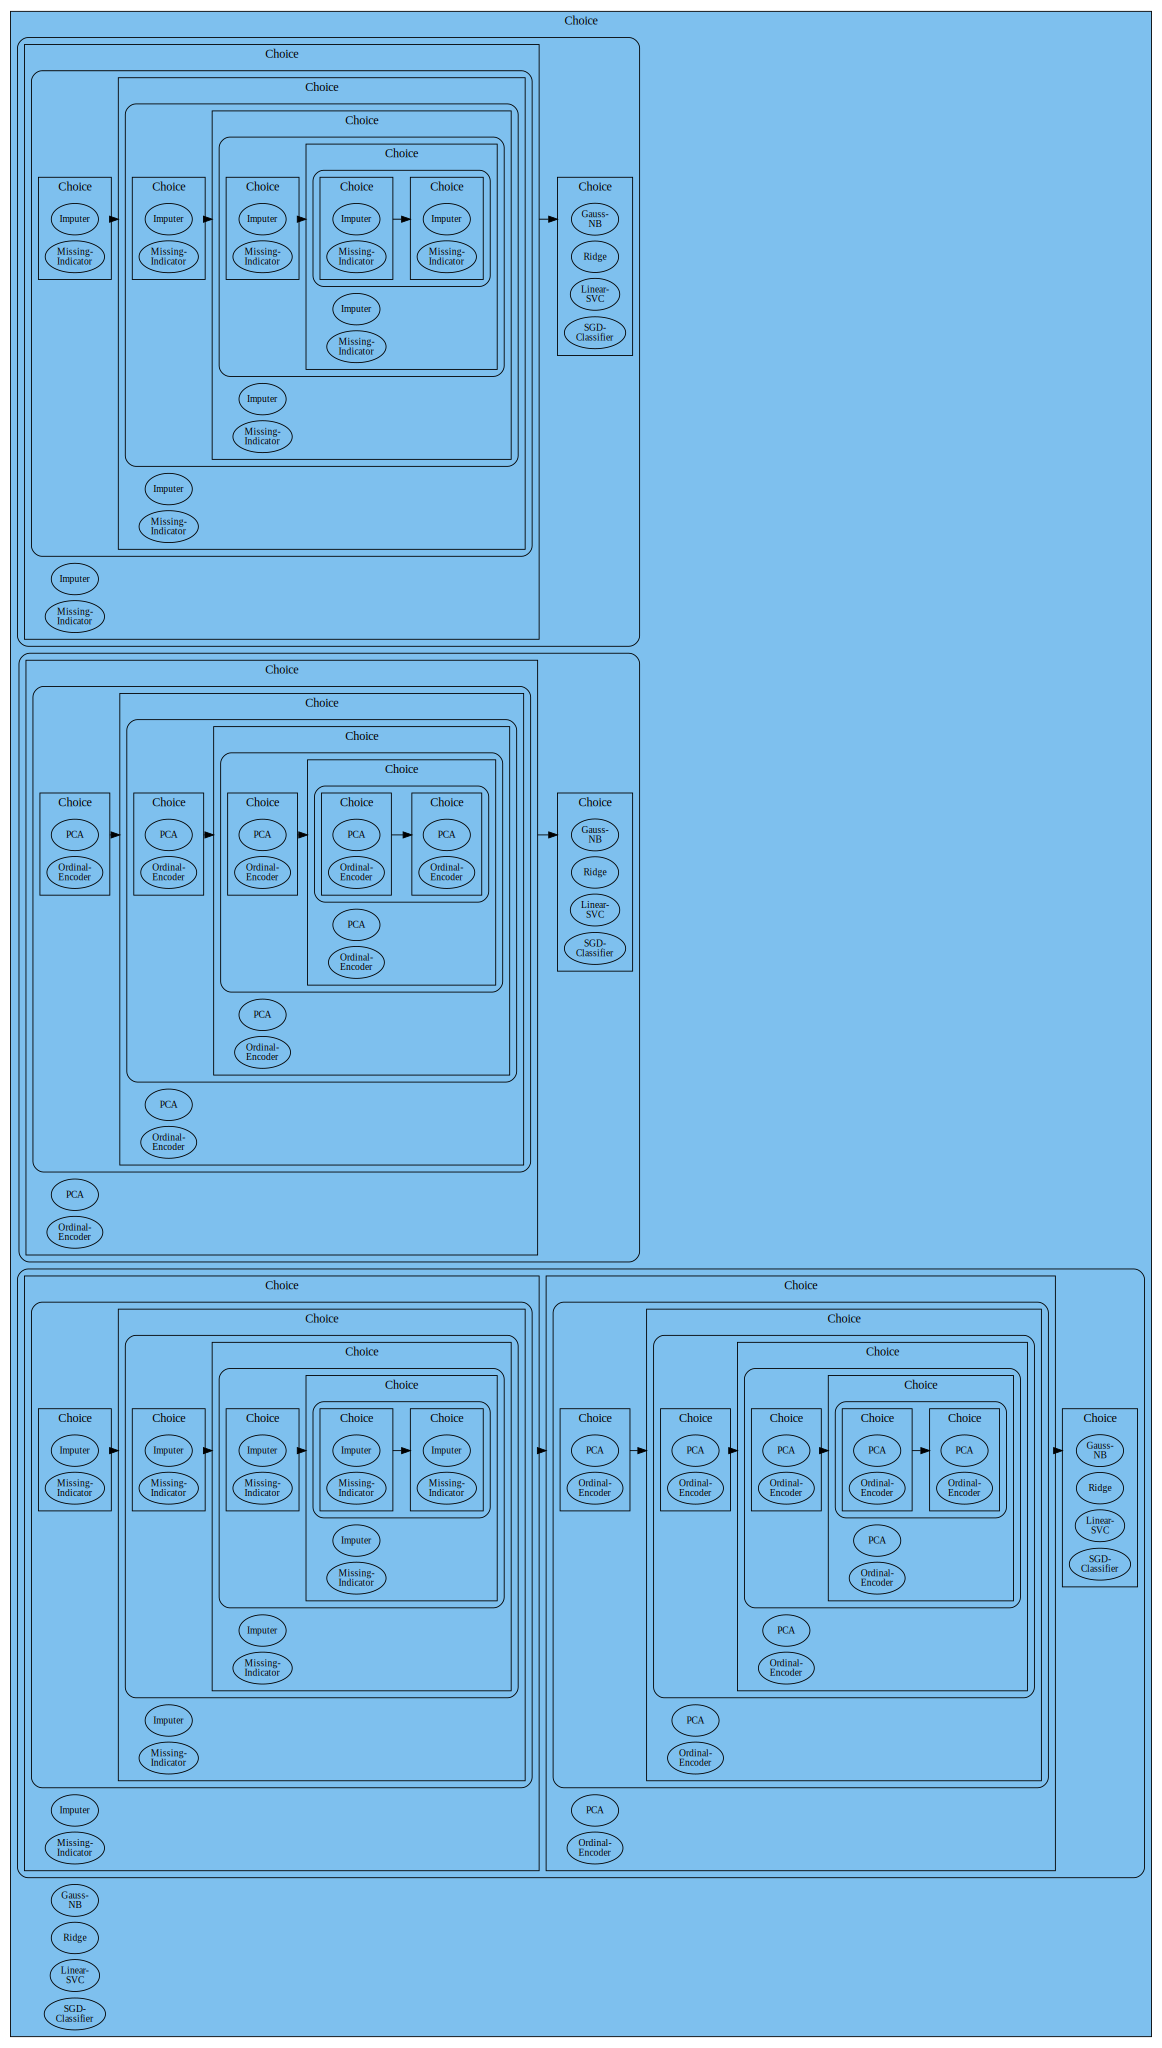

In [8]:
from sklearn.impute import SimpleImputer as Imputer
from sklearn.impute import MissingIndicator
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB as GaussNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder as OneHot
from sklearn.preprocessing import OrdinalEncoder
wrap_imported_operators()

g = Grammar()

g.start  = g.est | g.clean >> g.est | g.tfm >> g.est | g.clean >> g.tfm >> g.est
g.clean  = g.clean1 >> g.clean | g.clean1
g.tfm    = g.tfm1 >> g.tfm | g.tfm1

g.clean1 = Imputer | MissingIndicator
g.tfm1   = PCA | OrdinalEncoder # | OneHot
g.est    = GaussNB | Ridge  | LinearSVC | SGDClassifier

generated = explore(g, 6)
to_graphviz(generated)

 67%|██████▋   | 2/3 [00:03<00:01,  1.52s/it, best loss: -0.6914665534804754]

  File "/anaconda3/lib/python3.7/site-packages/lale/lib/lale/hyperopt.py", line 161, in f
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/anaconda3/lib/python3.7/site-packages/lale/lib/lale/hyperopt.py", line 144, in hyperopt_train_test
    raise e
  File "/anaconda3/lib/python3.7/site-packages/lale/lib/lale/hyperopt.py", line 124, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring)
  File "/anaconda3/lib/python3.7/site-packages/lale/helpers.py", line 250, in cross_val_score_track_trials
    trained = estimator.fit(X_train, y_train)
  File "/anaconda3/lib/python3.7/site-packages/lale/operators.py", line 1586, in fit
    output = trained.transform(X = inputs, y = y)
  File "/anaconda3/lib/python3.7/site-packages/lale/operators.py", line 1183, in transform
    result = self._validate_output_schema(result, 'transform')
  File "/

100%|██████████| 3/3 [00:04<00:00,  1.38s/it, best loss: -0.6914665534804754]


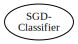

In [9]:
trainer = Hyperopt(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))

In [ ]:
p = Imputer >> PCA
trainer = Hyperopt(estimator=p, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)